In [1]:
import torch

In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
t2 = torch.tensor([1.,2.,3,4.])
t2

tensor([1., 2., 3., 4.])

In [5]:
t3 = torch.tensor([[1,2.],[2.,3]])
t3

tensor([[1., 2.],
        [2., 3.]])

In [6]:
t4 = torch.tensor([[[1.,1],
                    [1,1]],
                   [[1,1],
                    [1,1]]])
t4

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [7]:
t4.shape

torch.Size([2, 2, 2])

In [8]:
m = torch.tensor(3.,)
x = torch.tensor(2., requires_grad=True)
b = torch.tensor(4., requires_grad=True)
m, x, b

(tensor(3.), tensor(2., requires_grad=True), tensor(4., requires_grad=True))

In [9]:
y = m * x + b
y

tensor(10., grad_fn=<AddBackward0>)

In [10]:
print(y.backward())

None


In [11]:
import numpy as np

In [12]:
x = np.array([[1,2],[3,4]])
x

array([[1, 2],
       [3, 4]])

In [13]:
y = torch.from_numpy(x)
y

tensor([[1, 2],
        [3, 4]])

In [14]:
z = y.numpy()
z

array([[1, 2],
       [3, 4]])

## Linear Regression

In [25]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype = 'float32')

In [26]:
targets = np.array([[56, 70],
                   [87, 101],
                   [119, 33],
                    [22, 37],
                    [103, 119]], dtype = 'float32')

In [27]:
inputs = torch.from_numpy(inputs)

In [28]:
targets = torch.from_numpy(targets)

In [29]:
w = torch.randn(2, 3, requires_grad = True)
b = torch.randn(2, requires_grad = True)

In [31]:
def linreg(x):
    return x @ w.t() + b

In [32]:
preds = linreg(inputs)
print(preds)

tensor([[156.8286, -12.0507],
        [211.6605, -17.5723],
        [308.5734, -24.1718],
        [ 94.3936,  -6.8315],
        [237.7956, -20.1029]], grad_fn=<AddBackward0>)


In [33]:
print(targets)

tensor([[ 56.,  70.],
        [ 87., 101.],
        [119.,  33.],
        [ 22.,  37.],
        [103., 119.]])


In [34]:
# MSE Loss

def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [35]:
loss = mse(preds, targets)
loss

tensor(13038.6523, grad_fn=<DivBackward0>)

In [36]:
#Compute gradients
loss.backward()

In [37]:
#Gradients for weights
print(w.grad)

tensor([[10376.5039, 11836.3535,  7084.6826],
        [-7164.5288, -7766.2842, -5158.3486]])


In [38]:
#resetting gradients

w.grad.zero_()
b.grad.zero_()
print(w.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Gradient Descent

1. Generate predictions
2. Calculate loss
3. Compute gradients wrt weights and biases
4. Adjust weights acc to gradient
5. Reset gradients to zero

In [43]:
preds = linreg(inputs)

In [44]:
loss = mse(preds, targets)

In [46]:
loss.backward()

In [47]:
#adjusting weights and bias

with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [48]:
preds = linreg(inputs)
loss = mse(preds, targets)
print(loss)

tensor(5875.1846, grad_fn=<DivBackward0>)


In [49]:
# Multiple epochs

for i in range(100):
    preds = linreg(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [50]:
preds = linreg(inputs)
loss = mse(preds, targets)
print(loss)

tensor(626.4384, grad_fn=<DivBackward0>)


In [51]:
preds, targets

(tensor([[ 55.7537,  57.9144],
         [ 77.8103,  77.2692],
         [137.2464,  82.3639],
         [  6.9308,  59.5481],
         [102.1989,  74.6740]], grad_fn=<AddBackward0>),
 tensor([[ 56.,  70.],
         [ 87., 101.],
         [119.,  33.],
         [ 22.,  37.],
         [103., 119.]]))

## Linear Regression using PyTorch Libraries

In [ ]:
import torch.nn as nn

https://jovian.ai/aakashns/02-linear-regression

## Logistic Regression - Image Classification 

In [52]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [53]:
dataset = MNIST(root = 'data/', download = True)

In [54]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [55]:
test_dataset = MNIST(root = 'data/', train = False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image, label = dataset [0]

In [ ]:
plt.imshow(image, cmap = 'gray')
print('Label: ', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

### Model

In [ ]:
import torch.nn as nn

In [ ]:
input_size = 28*28
num_classes = 10

In [ ]:
model = nn.Linear(input_size, num_classes)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784) # pytorch will figure out what should be the dimension replacing -1 
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

### Softmax function

In [ ]:
import torch.nn.functional as F

## Deep Neural Network

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [2]:
dataset = MNIST(root='data/', transform = ToTensor())

In [3]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [4]:
batch_size = 128

In [5]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

Image dimensions: torch.Size([128, 1, 28, 28])


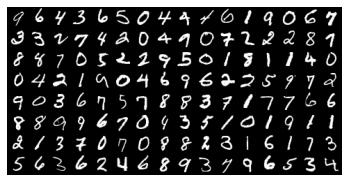

In [6]:
for images, _ in train_loader:
    print('Image dimensions:', images.shape)
    plt.figure
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [7]:
def accuracy(output, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds==labels)/len(preds))

In [10]:
class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        #hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        #o/p layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        #Flatter image tensor
        xb = xb.view(xb.size(0), -1) #linear layers expect a vector
        #intermediate output from hidden layer
        out = self.linear1(xb)
        #apply activation function
        out = F.relu(out)
        #final preds from output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) # generate preds
        loss = F.cross_entropy(out, labels) # calc loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images) # generate preds
        loss = F.cross_entropy(out, labels) # calc loss
        acc = accuracy(out, labels)
        return {'val_loss' : loss.detach(), 'val_acc' : acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss   = torch.stack(batch_losses).mean() #combine losses
        batch_accs   = [x['val_acc'] for x in outputs]
        epoch_acc    = torch.stack(batch_accs).mean() #combine accuracies
        return {'val_loss' : epoch.loss.item(), 'val_acc' : epoch.acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}, val_loss: {:.4f}, val_acc: {:.4f}]".format(epoch, result['val_loss'], ['val_acc']))

In [12]:
input_size = 784
hidden_size = 32
num_classes = 10

In [13]:
model = MnistModel(input_size, hidden_size, num_classes)

In [14]:
model

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [15]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [17]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break
    
print(outputs.shape)
print(outputs[:2].data)

Loss: 2.323112726211548
torch.Size([128, 10])
tensor([[-0.2235,  0.1837,  0.0089, -0.0834,  0.1049,  0.2534, -0.2112,  0.0907,
         -0.0979,  0.1895],
        [-0.1669,  0.2420,  0.0304, -0.1066, -0.0903,  0.1988, -0.2066,  0.0409,
         -0.0121,  0.1816]])
